# BIA 6304 Predictive Models Fall 2017
## Assignment 1 
## Notebook 2
### Stuent:  Leonardo Ji
### 10/28/2017

### Import Standard packages

In [1]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

#### Notebook 2: Practice with Scikit Learn
You can refer to my example and the sklearn documentation: http://scikit-learn.org/stable/index.html. In fact, feel free to replicate my sklearn code in the Week 1, part 1 folder. 
We are going to perform a basic classification process like you did in ADM, but do it with sklearn. 

a)	Read in the Churn Calls dataset. (500 obs, 2 class target). Call the dataframe Churn.

b)	Set the target variable as Churn (a yes/no variable). 

c)	Perform some EDA so you get a feel for the data. Make comments on what you see and how it might affect your analysis.

d)	Transform the data so factors are dummied and missing values (if any) are fixed.

e)	Create a train and test sample of 70/30. 

f)	Perform a basic decision tree. Alter at least 2 default arguments. Show your classification and confusion matrix. 

g)	Cross validate your decision tree. CV=5 or 10.

h)	Perform a KNN=3. Show your classification and confusion matrix. 

i)	Cross Validate your KNN. Comment on what this tells you.

j)	Perform a Naïve Bayes. Show your classification and confusion matrix. 

k)	Cross validate your NB. Comment on what this tells you.

l)	Optional- add a Random Forest.


Discuss your best performing algorithm. Also each section should have some thought out comments (done in markup) on what was done and what was found. Look at several of the examples I gave. 

Your output for the above should look nice and professional AND well annotated. No pages and pages of junk output. Use heads, tails, and constrain output so it looks good. A large part of the grade for this section is professionalism in a Juypter notebook. 

In [3]:
cd C:\\Users\\lj015625\\Desktop\\Predictive Model\\Pred_Models_git\\Week 2

C:\Users\lj015625\Desktop\Predictive Model\Pred_Models_git\Week 2


In [67]:
churn = pd.read_csv("data/Churn_Calls.csv", sep=",", encoding = 'utf8')
print(churn.shape)
print(churn.columns)
churn.head()

(5000, 20)
Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no


In [68]:
# designate target variable name
targetName = 'churn'
targetSeries = churn[targetName]
#remove target from current location and insert in collum 0
del churn[targetName]
churn.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
churn.head()

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0


### Exploratory data analysis
Target variable churn is binary "yes" or "no" categorical variables. More churn has "no" than "yes" so a predictive model does well on predicting "yes" (high recall/sensitivty ratio) is a good model.

The other features including both numerical and categorical.  Some like state, area_code, international_plan, voice_mail_plan are categorical variables.  Interestingly, state_code has 51 unique states while area code has only three types of area code.  I would convert them to dummy variables. Some features such as showed strong correlations. I would not need both in my models.
* total_day_minutes and total_day_charge
* total_eve_minutes and total_eve_charge 
* total_night_calls and total_night_charge
* total_intl_minutes and total_intl_charge

In [69]:
#show variables by type
churn.dtypes

churn                             object
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

#### Target variable is Churn.  It is binary meaning either "yes" or "no" for Churn. There are more "no" than "yes". We need a good model that is good at predicting "yes" churn.  Higher Recall or sensitivity ratio.

In [70]:
churn.churn.unique()

array(['no', 'yes'], dtype=object)

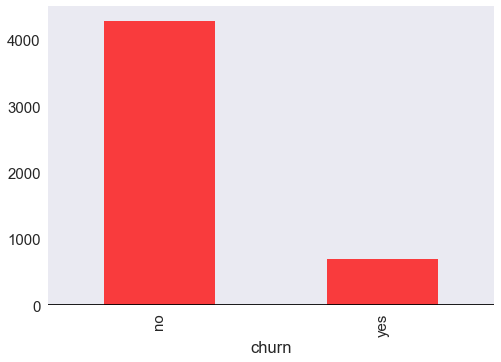

In [71]:
groupby = churn.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False, color='red', alpha=0.75)
plt.axhline(0, color='black')

In [72]:
print(churn.state.unique())
print(len(churn.state.unique()))

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE'
 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT'
 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
51


In [73]:
churn.area_code.unique()

array(['area_code_408', 'area_code_415', 'area_code_510'], dtype=object)

In [74]:
churn.international_plan.unique()

array(['no', 'yes'], dtype=object)

In [75]:
churn.voice_mail_plan.unique()

array(['no', 'yes'], dtype=object)

In [76]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Strong correlations between some features:
* total_day_minutes and total_day_charge
* total_eve_minutes and total_eve_charge 
* total_night_calls and total_night_charge
* total_intl_minutes and total_intl_charge

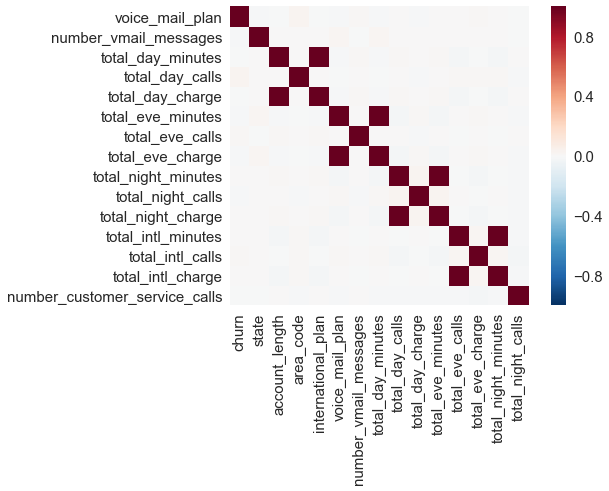

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(churn.corr(), 
            cbar=True,
            annot=False,
            square=True,
            fmt='.2f',
            yticklabels=churn.columns.values,
            xticklabels=churn.columns.values)
plt.show()

In [78]:
for col in churn.columns[1:]:
    attName = col
    dType = churn[col].dtype
    # discretize (create dummies)
    if dType == object:
        churn = pd.concat([churn, pd.get_dummies(churn[col], prefix=col)], axis=1)
        del churn[attName]
churn.columns

Index(['churn', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'sta

In [79]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,...,0.021200,0.03160,0.023000,0.25180,0.499000,0.249200,0.905400,0.094600,0.735400,0.264600
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,...,0.144065,0.17495,0.149918,0.43409,0.500049,0.432593,0.292691,0.292691,0.441164,0.441164
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,...,0.000000,0.00000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,...,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
churn=churn.drop('total_day_charge',axis=1)
churn=churn.drop('total_eve_charge',axis=1)
churn=churn.drop('total_night_charge',axis=1)
churn=churn.drop('total_intl_charge',axis=1)

In [81]:
churn.head()

,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,no,1,0,175.2,74,151.7,79,230.5,109,5.3,...,0,0,0,1,0,0,1,0,1,0
1,no,36,30,146.3,128,162.5,80,129.3,109,14.5,...,0,0,0,1,0,0,1,0,0,1
2,yes,36,19,171.9,96,198.4,111,321.7,76,10.5,...,0,0,0,0,1,0,0,1,0,1
3,no,41,0,159.3,66,125.9,75,261.9,76,11.1,...,0,0,0,0,1,0,1,0,1,0
4,no,42,0,171.0,129,183.9,96,130.2,90,4.6,...,0,0,0,0,1,0,1,0,1,0


### Randomly split your dataset into Train/Test 

In [82]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    churn.iloc[:,1:].values, churn.iloc[:,0].values, test_size=0.40, random_state=0)

### Run a Decision Tree Model using the above created train/test 
Use parameters: min_samples_leaf = 5, min_samples_split = 5, random_state = 42

In [239]:
#Decision Tree train model. Call up my model and name it clf
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 5, random_state = 42)
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')


In [240]:
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

#### Get decision tree accuracy recall ratio

In [241]:
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.9435
             precision    recall  f1-score   support

         no       0.96      0.98      0.97      1708
        yes       0.85      0.74      0.79       292

avg / total       0.94      0.94      0.94      2000

[[1670   38]
 [  75  217]]


#### Verify Decision Tree with 10-fold Cross Validation
All 10-folds results within 2 percentage from 94% to 96%.

In [242]:
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()     

Cross Validation Score for each K [ 0.96677741  0.93355482  0.94019934  0.95681063  0.94352159  0.94648829
  0.94648829  0.94314381  0.94314381  0.94314381]


0.94632718141312677

### Run KNN Model using the above created train/test 

In [184]:
# loading library
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 5)
clf_knn = KNeighborsClassifier(n_neighbors=5, p = 1)
clf_knn.fit(features_train, target_train)
print(clf_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')


In [189]:
# make predictions
knn_expected = target_test
knn_predicted = clf_knn.predict(features_test)
print(clf_knn.score(features_test, target_test))

0.885


In [190]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn_expected, knn_predicted)))
print(metrics.classification_report(knn_expected, knn_predicted))

accuracy: 0.885
             precision    recall  f1-score   support

         no       0.89      0.99      0.94      1708
        yes       0.79      0.29      0.42       292

avg / total       0.88      0.89      0.86      2000



#### Verify KNN with 10-fold Cross Validation
All 10-folds results within 2 percentage from 87% to 89% and this means the model does not overfit.

In [187]:
scores = cross_val_score(clf_knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()   

Cross Validation Score for each K [ 0.87375415  0.87707641  0.89036545  0.90365449  0.88039867  0.89632107
  0.89966555  0.8729097   0.89297659  0.89632107]


0.88834431493683252

### Run Naive Bayes Model using the above created train/test 

In [274]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
clf_nb = MultinomialNB(fit_prior  = False)
clf_nb.fit(features_train, target_train)
print(clf_nb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)


In [275]:
# make predictions
clf_nb_expected = target_test
clf_nb_predicted = clf_nb.predict(features_test)

print(clf_nb.score(features_test, target_test))

0.556


In [276]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf_nb_expected, clf_nb_predicted)))
print(metrics.classification_report(clf_nb_expected, clf_nb_predicted))

accuracy: 0.556
             precision    recall  f1-score   support

         no       0.90      0.54      0.68      1708
        yes       0.19      0.63      0.29       292

avg / total       0.79      0.56      0.62      2000



#### Verify NB with 10-fold Cross Validation
All 10-folds results more than 2 percentage from 52% to 62% and this means the model overfitting.

In [271]:
scores = cross_val_score(clf_nb, features_train, target_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()   

Cross Validation Score for each K [ 0.56478405  0.56478405  0.58803987  0.5282392   0.55481728  0.57859532
  0.5819398   0.53511706  0.55183946  0.62541806]


0.56735741508238979

### Run Random Forest Model using the above created train/test 

In [284]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(min_samples_leaf = 5, min_samples_split = 5, 
                                      random_state = 42)
clf_rf.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [285]:
clf_rf_expected = target_test
clf_rf_predicted = clf_rf.predict(features_test)
print(clf_rf.score(features_test, target_test))
#print(clf_rf.feature_importances_)

0.919


In [286]:
# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf_rf_expected, clf_rf_predicted)))
print(metrics.classification_report(clf_rf_expected, clf_rf_predicted))

accuracy: 0.919
             precision    recall  f1-score   support

         no       0.92      0.99      0.95      1708
        yes       0.90      0.50      0.64       292

avg / total       0.92      0.92      0.91      2000



#### Verify Random Forest with 10-fold Cross Validation
All 10-folds results within 2 percentage from 88% to 91% and this means the model is even better than Decision Tree on overfitting.

In [288]:
scores = cross_val_score(clf_rf, features_train, target_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.88372093  0.90697674  0.91694352  0.90033223  0.91362126  0.91638796
  0.90635452  0.89966555  0.90301003  0.91638796]


0.90634007044522724

### Summary
The random forest is the best model for predicting churn because the Random Forest model has higher Recall ratio on predicting churn "yes".  

* EDA helped us understand there are more "no" than "yes". We need a good model that is good at predicting "yes" churn.
* Some features such as total_day_minutes and total_day_chargeshowed strong correlations. I only used one of them.
* Decision Tree with min_samples_leaf = 5 and min_samples_split = 5 showed a 74% recall ratio, but not as good as Random Forest on overfitting.
* Naive Bayes 10-fold cross validation showed higher variance on accuracy.  The model is overfitting.  I would not select it despite a higher recall ratio.
* KNN model did not overfit. KNN was good at predicting churn "no" but not "yes". I would not select it if my business case is to predict churn "yes".



# END